In [1]:
import re
import pickle
import numpy as np
import pandas as pd

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv("/home/neelchoksi19bce0990/Documents/S/DLOM/ML/2_textClassification/data/IMDBDataset.csv")

In [3]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

dataset['sentiment'] = encoder.fit_transform(dataset['sentiment'])

In [5]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [6]:
dataset.rename(columns = {'review':'text'}, inplace = True)

In [7]:
dataset.head()

,text,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [8]:
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [9]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwords = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [10]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/neelchoksi19bce0990/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/neelchoksi19bce0990/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
lemmatizer = WordNetLemmatizer()
# grouping together the inflected forms ("better" -> "good")

def preprocess(textdata):
    processed_texts = []

    # Defining regex patterns.
    url_pattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    user_pattern = '@[^\s]+'
    alpha_pattern = "[^a-zA-Z0-9]"
    sequence_pattern = r"(.)\1\1+"
    seq_replace_pattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(url_pattern, ' URL', tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
            # Replace @USERNAME to 'USER'.
        tweet = re.sub(user_pattern, ' USER', tweet)
        # Replace all non alphabets.
        tweet = re.sub(alpha_pattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequence_pattern, seq_replace_pattern, tweet)

        preprocessed_words = []
        for word in tweet.split():
            # Check if the word is a stopword.
            if len(word) > 1 and word not in stopwords:
                # Lemmatizing the word.
                word = lemmatizer.lemmatize(word)
                preprocessed_words.append(word)

        processed_texts.append(' '.join(preprocessed_words))

    return processed_texts


In [12]:
processedtext = preprocess(text)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)


In [14]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

In [20]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [21]:
def model_evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


In [22]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1257
           1       0.84      0.89      0.86      1243

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



In [23]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1257
           1       0.87      0.90      0.89      1243

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500



In [24]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1257
           1       0.88      0.91      0.89      1243

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500



In [25]:
# Pipeline!!
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)

pipe = Pipeline([('vectorizer', vectorizer), ('lr', LRmodel)])
pipe.fit(X_train, y_train)

model_evaluate(pipe)


              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1257
           1       0.88      0.91      0.89      1243

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500



In [22]:
with open('pipeline.pickle','wb') as f:
    pickle.dump(pipe, f)
    
with open('pipeline.pickle', 'rb') as f:
    loaded_pipe = pickle.load(f)
    
model_evaluate(loaded_pipe)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1257
           1       0.90      0.92      0.91      1243

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



In [26]:
with open('pipeline.pickle', 'rb') as f:
    loaded_pipe = pickle.load(f)
    
# model_evaluate(loaded_pipe)

In [27]:
def predict(model, text):
    # Predict the sentiment
    preprocessed_text = preprocess(text)
    predictions = model.predict(preprocessed_text)

    pred_to_label = {0: 'Positive', 1: 'Negative'}

    # Make a list of text with sentiment.
    data = []
    for t, pred in zip(text, predictions):
        data.append((t, pred, pred_to_label[pred]))

    return data


if __name__=="__main__":
    # Text to classify should be in a list.
    text = ["I hate twitter",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good"]
    
    predictions = predict(loaded_pipe, text)
    print(predictions)


[('I hate twitter', 1, 'Negative'), ('May the Force be with you.', 1, 'Negative'), ("Mr. Stark, I don't feel so good", 1, 'Negative')]


# m6 - predict sentiment arr 

In [63]:
# X_train = pd.read_csv('../../../ML/2_textClassification/data/X_train.csv')
# y_train = pd.read_csv('../../../ML/2_textClassification/data/y_train.csv')
# X_test = pd.read_csv('../../../ML/2_textClassification/data/X_test.csv')
# y_test = pd.read_csv('../../../ML/2_textClassification/data/y_test.csv')

# X_train=X_train.drop(['Unnamed: 0'],axis=1)
# y_train=y_train.drop(['Unnamed: 0'],axis=1)
# X_test=X_test.drop(['Unnamed: 0'],axis=1)
# y_test=y_test.drop(['Unnamed: 0'],axis=1)

# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy()
# X_test = X_test.to_numpy()
# y_test = y_test.to_numpy()

In [112]:
X_train

<47500x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 4265836 stored elements in Compressed Sparse Row format>

In [114]:
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import matthews_corrcoef
# from sklearn.metrics import f1_score

# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression # meta lerner


# svc = SVC(kernel='sigmoid',gamma=1.0)
# knc = KNeighborsClassifier()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear',penalty='l1')
# gnb = GaussianNB()

# estimator_list = [
#     ('SVC',svc),
#     ('KNC',knc),
#     ('DTC',dtc),
#     ('LRC',lrc),
#     ('GNB',gnb),   
# ]
# stack_model = StackingClassifier(
#     estimators = estimator_list, final_estimator = LogisticRegression()
# )

# stack_model.fit(X_train.toarray(),y_train)

# y_train_pred = stack_model.predict(X_train)
# y_test_pred = stack_model.predict(X_test)


# #training set model performance
# #Train set performance 
# stack_model_train_accuracy = accuracy_score(y_train,y_train_pred)
# stack_model_train_mcc = matthews_corrcoef(y_train,y_train_pred)
# stack_model_train_f1 = f1_score(y_train,y_train_pred,average="weighted")

# #Test set performance
# stack_model_test_accuracy = accuracy_score(y_test,y_test_pred)
# stack_model_test_mcc = matthews_corrcoef(y_test,y_test_pred)
# stack_model_test_f1 = f1_score(y_test,y_test_pred,average="weighted")


# #stacking model train accuracies : 
# print("stack_model : train accuracies")
# print ("accuracy %s" % stack_model_train_accuracy)
# print("matthews corr coef : %s" %stack_model_train_mcc)
# print("f1 score : %s" %stack_model_train_f1)

# #stacking model test accuracies:
# print("stack_model : test accuracies")
# print ("accuracy %s" % stack_model_test_accuracy)
# print("matthews corr coef : %s" %stack_model_test_mcc)
# print("f1 score : %s" %stack_model_test_f1)

ValueError: cannot use sparse input in 'SVC' trained on dense data

In [ ]:
model_evaluate(stack_model)

In [ ]:
# import gensim 
# from nltk import sent_tokenize 
# from gensim.utils import simple_preprocess

# all_reviews = []
# for doc in df_movie['review']:
#     raw_sent = sent_tokenize(doc)
#     for sent in raw_sent:
#         all_reviews.append(simple_preprocess(sent))

In [ ]:
# model_w2v_ml = gensim.models.Word2Vec(
# window=10,
# min_count=2)

In [ ]:
# model_w2v_ml.build_vocab(all_reviews)

In [ ]:
# model_w2v_ml.train(all_reviews,total_examples=model_w2v_ml.corpus_count,epochs = model_w2v_ml.epochs)

In [ ]:
# def document_vector(doc):
#     doc= [word for word in doc.split() if word in model_w2v_ml.wv.index_to_key]
#     if(len(doc) == 0):
#         return np.zeros(100)
#     return np.mean(model_w2v_ml.wv[doc],axis=0)

In [ ]:
# from tqdm import tqdm
# X = []
# for doc in tqdm(df_movie['review'].values):
#     X.append(document_vector(doc))

In [67]:
# # Pipeline!!
# from sklearn.pipeline import Pipeline

# X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
#                                                     test_size = 0.05, random_state = 0)

# pipe = Pipeline([('vectorizer', vectorizer), ('stack', stack_model)])
# pipe.fit(X_train, y_train)

# model_evaluate(pipe)


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
# with open('pipeline.pickle','wb') as f:
#     pickle.dump(pipe, f)
    


In [28]:
with open('pipeline.pickle', 'rb') as f:
    loaded_pipe = pickle.load(f)
    
# model_evaluate(loaded_pipe)

In [ ]:
# def predict(model, text):
#     # Predict the sentiment
#     preprocessed_text = preprocess(text)
#     predictions = model.predict(preprocessed_text)

#     pred_to_label = {0: 'Positive', 1: 'Negative'}

#     # Make a list of text with sentiment.
#     data = []
#     for t, pred in zip(text, predictions):
#         data.append((t, pred, pred_to_label[pred]))

#     return data


# if __name__=="__main__":
#     # Text to classify should be in a list.
#     text = ["I hate twitter",
#             "May the Force be with you.",
#             "Mr. Stark, I don't feel so good"]
    
#     predictions = predict(loaded_pipe, text)
#     print(predictions)


# data from mongodb for m1,m2,m3,m4,m5:

In [29]:
import pymongo
import pandas as pd 
import datetime

In [30]:
mongo_client = pymongo.MongoClient("mongodb://localhost:27018")

In [31]:
dlom_server_mus2_orderclient = mongo_client["dlom_server_mus2_orderclient"]
dlom_server_mus2_orderlogs = mongo_client["dlom_server_mus2_orderlogs"]

In [32]:
print(dlom_server_mus2_orderclient)
print(dlom_server_mus2_orderlogs)

Database(MongoClient(host=['localhost:27018'], document_class=dict, tz_aware=False, connect=True), 'dlom_server_mus2_orderclient')
Database(MongoClient(host=['localhost:27018'], document_class=dict, tz_aware=False, connect=True), 'dlom_server_mus2_orderlogs')


In [33]:
dlom_orders_collection = dlom_server_mus2_orderclient["dlomorders"]
print(dlom_orders_collection)

Collection(Database(MongoClient(host=['localhost:27018'], document_class=dict, tz_aware=False, connect=True), 'dlom_server_mus2_orderclient'), 'dlomorders')


In [34]:
dlom_clients_collection =  dlom_server_mus2_orderclient["dlomclients"]
print(dlom_clients_collection)

Collection(Database(MongoClient(host=['localhost:27018'], document_class=dict, tz_aware=False, connect=True), 'dlom_server_mus2_orderclient'), 'dlomclients')


In [35]:
dlom_orderlogs_collection = dlom_server_mus2_orderlogs["orderlogs"]
print(dlom_orderlogs_collection)

Collection(Database(MongoClient(host=['localhost:27018'], document_class=dict, tz_aware=False, connect=True), 'dlom_server_mus2_orderlogs'), 'orderlogs')


In [36]:
do_one_record = dlom_orders_collection.find_one()
do_one_record

{'_id': ObjectId('63ce7e543cb25e08b646e2e8'),
 'clientId': ObjectId('63ce7e473cb25e08b646e2e0'),
 'salesperson': '63d57088175d4fbd6cb97e70',
 'salesOrder': {'distributorName': 'company1114',
  'distributorDetails': 'addr11',
  'voucherNo': 'vno23',
  'dated': '2023-02-08',
  'modeTermsOfPayment': 'mode1',
  'buyerRefOrderNo': 'buyer12',
  'otherRef': 'oref2',
  'invoiceTo': 'invto2',
  'despatchThrough': 'despt',
  'destination': 'dest',
  'termsOfDelivery': 'terms',
  'soTable': [{'siNo': 0,
    'descriptionOfGoods': 'desc1',
    'dueOn': '2023-02-22',
    'qty': 100,
    'rate': '100',
    'per': 'unit',
    'amount': '10000',
    '_id': ObjectId('63faed58f8c0a4de3b6742a4')}],
  'totalQty': 100,
  'totalAmt': '10000',
  'amtInWords': 'ten thousand only'},
 'invoice': {'distributorName': 'company1114',
  'distributorDetails': 'addr11',
  'invoiceNo': 'inv122',
  'dated': '2023-02-25',
  'deliveryNote': 'delnote1',
  'supplierRef': 'sref1',
  'otherRef': 'orref2',
  'client': 'cli2',
 

In [37]:
dc_one_record = dlom_clients_collection.find_one()
dc_one_record

{'_id': ObjectId('63ce7e473cb25e08b646e2e0'),
 'companyName': 'JJ Electronics',
 'contactPersonName': 'John Doe',
 'address': '  Street:  183,184, Avarampalayam Road, Sidhapudur  City:   Coimbatore  State/province/area:    Tamil Nadu    Zip code  641044  Country calling code  +91 Country  India ',
 'gst': '37AADCS0472N1Z1',
 'phoneNumber': '04222329232',
 'discountRate': '5',
 'salesPersonAssigned': 'Jim Jones',
 'clientSocialMedia': [{'title': 'country',
   'link': 'IND',
   '_id': ObjectId('641c9e1037f039be4b993222')},
  {'title': 'LinkedIN',
   'link': 'https://www.linkedin.com/in/neel-choksi-73232719b/',
   '_id': ObjectId('641c9e1037f039be4b993223')}],
 'typeOfCustomer': 'potential',
 'crm': [{'msg': 'Hoping to receive the next shipment soon.',
   'personType': 'client',
   'timestamp': '2023-01-29 03:09',
   '_id': ObjectId('641ca23637f039be4b993358')},
  {'msg': 'Definitely, the shipment is on its way.',
   'personType': 'sp',
   'timestamp': '2023-02-19 00:12',
   '_id': Object

{'_id': ObjectId('63ce7e543cb25e08b646e2e8'), 'clientId': ObjectId('63ce7e473cb25e08b646e2e0'), 'salesperson': '63d57088175d4fbd6cb97e70', 'salesOrder': {'distributorName': 'company1114', 'distributorDetails': 'addr11', 'voucherNo': 'vno23', 'dated': '2023-02-08', 'modeTermsOfPayment': 'mode1', 'buyerRefOrderNo': 'buyer12', 'otherRef': 'oref2', 'invoiceTo': 'invto2', 'despatchThrough': 'despt', 'destination': 'dest', 'termsOfDelivery': 'terms', 'soTable': [{'siNo': 0, 'descriptionOfGoods': 'desc1', 'dueOn': '2023-02-22', 'qty': 100, 'rate': '100', 'per': 'unit', 'amount': '10000', '_id': ObjectId('63faed58f8c0a4de3b6742a4')}], 'totalQty': 100, 'totalAmt': '10000', 'amtInWords': 'ten thousand only'}, 'invoice': {'distributorName': 'company1114', 'distributorDetails': 'addr11', 'invoiceNo': 'inv122', 'dated': '2023-02-25', 'deliveryNote': 'delnote1', 'supplierRef': 'sref1', 'otherRef': 'orref2', 'client': 'cli2', 'despatchDocNo': 'des', 'deliveryNoteDate': '2023-02-13', 'despatchedThroug
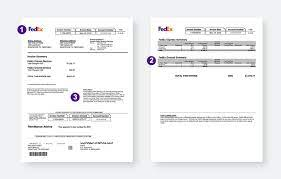

In [38]:
do_all_records = dlom_orders_collection.find()
print(do_all_records)
for row in do_all_records:
    print(row)

In [39]:
dc_all_records = dlom_clients_collection.find()
print(dc_all_records)
for row in dc_all_records :
    print(row)

{'_id': ObjectId('63ce7e473cb25e08b646e2e0'), 'companyName': 'JJ Electronics', 'contactPersonName': 'John Doe', 'address': '  Street:  183,184, Avarampalayam Road, Sidhapudur  City:   Coimbatore  State/province/area:    Tamil Nadu    Zip code  641044  Country calling code  +91 Country  India ', 'gst': '37AADCS0472N1Z1', 'phoneNumber': '04222329232', 'discountRate': '5', 'salesPersonAssigned': 'Jim Jones', 'clientSocialMedia': [{'title': 'country', 'link': 'IND', '_id': ObjectId('641c9e1037f039be4b993222')}, {'title': 'LinkedIN', 'link': 'https://www.linkedin.com/in/neel-choksi-73232719b/', '_id': ObjectId('641c9e1037f039be4b993223')}], 'typeOfCustomer': 'potential', 'crm': [{'msg': 'Hoping to receive the next shipment soon.', 'personType': 'client', 'timestamp': '2023-01-29 03:09', '_id': ObjectId('641ca23637f039be4b993358')}, {'msg': 'Definitely, the shipment is on its way.', 'personType': 'sp', 'timestamp': '2023-02-19 00:12', '_id': ObjectId('641ca23637f039be4b993359')}, {'msg': 'Re

[{'_id': ObjectId('63ce7e543cb25e08b646e2e8'), 'clientId': ObjectId('63ce7e473cb25e08b646e2e0'), 'salesperson': '63d57088175d4fbd6cb97e70', 'salesOrder': {'distributorName': 'company1114', 'distributorDetails': 'addr11', 'voucherNo': 'vno23', 'dated': '2023-02-08', 'modeTermsOfPayment': 'mode1', 'buyerRefOrderNo': 'buyer12', 'otherRef': 'oref2', 'invoiceTo': 'invto2', 'despatchThrough': 'despt', 'destination': 'dest', 'termsOfDelivery': 'terms', 'soTable': [{'siNo': 0, 'descriptionOfGoods': 'desc1', 'dueOn': '2023-02-22', 'qty': 100, 'rate': '100', 'per': 'unit', 'amount': '10000', '_id': ObjectId('63faed58f8c0a4de3b6742a4')}], 'totalQty': 100, 'totalAmt': '10000', 'amtInWords': 'ten thousand only'}, 'invoice': {'distributorName': 'company1114', 'distributorDetails': 'addr11', 'invoiceNo': 'inv122', 'dated': '2023-02-25', 'deliveryNote': 'delnote1', 'supplierRef': 'sref1', 'otherRef': 'orref2', 'client': 'cli2', 'despatchDocNo': 'des', 'deliveryNoteDate': '2023-02-13', 'despatchedThrou
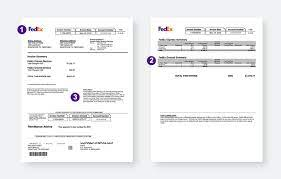

In [40]:
do_all_records = dlom_orders_collection.find()
do_list_cursor = list(do_all_records)
print(do_list_cursor)

In [41]:
do_df = pd.DataFrame(do_list_cursor)
do_df.head()

,_id,clientId,salesperson,salesOrder,invoice,wareHouseReceipt,salesReceipt,orderDelivery,orderCancel,orderPayment,createdAt,updatedAt,__v
0,63ce7e543cb25e08b646e2e8,63ce7e473cb25e08b646e2e0,63d57088175d4fbd6cb97e70,"{'distributorName': 'company1114', 'distributo...","{'distributorName': 'company1114', 'distributo...","[{'imgString': 'testimg url1', '_id': 63faed58...","{'distributorName': 'company1114', 'distributo...",{'history': [{'timeStamp': '2023-02-18T12:12:3...,"{'timeStamp': '2023-01-23T12:32:13.152Z', 'sta...",{'history': [{'timeStamp': '2023-02-18T12:13:1...,2023-01-23 12:32:20.243,2023-02-26 05:25:44.253,0
1,63cf8c6b0f0f991962134b55,63ce7e473cb25e08b646e2e0,,"{'distributorName': 'company11146', 'distribut...","{'distributorName': 'company11146', 'distribut...","[{'imgString': '', '_id': 63f60d143df4288c08ee...","{'distributorName': 'company11146', 'distribut...",{'history': [{'timeStamp': '2023-02-22T12:36:3...,"{'timeStamp': '2023-01-24T07:44:25.257Z', 'sta...",{'history': [{'timeStamp': '2023-02-22T12:39:3...,2023-01-24 07:44:43.616,2023-02-22 12:39:48.669,0
2,63d247f7ef4b90ee6baa5777,63ce7e473cb25e08b646e2e0,,"{'distributorName': 'company11146', 'distribut...","{'distributorName': 'company11146', 'distribut...","[{'imgString': '', '_id': 63f0c158119c38497d5c...","{'distributorName': 'company11146', 'distribut...",{'history': []},"{'timeStamp': '2023-01-26T09:29:15.749Z', 'sta...",{'history': []},2023-01-26 09:29:27.505,2023-02-18 12:15:20.148,0
3,63d6084c552dd4d69eee1f57,63ce7e473cb25e08b646e2e0,63d57048175d4fbd6cb97e68,"{'distributorName': 'company1114', 'distributo...","{'distributorName': 'company1114', 'distributo...","[{'imgString': '', '_id': 63fa1deb0613abd66137...","{'distributorName': 'company1114', 'distributo...",{'history': [{'timeStamp': '2023-01-29T08:33:5...,"{'timeStamp': '2023-01-29T05:40:51.542Z', 'sta...",{'history': [{'timeStamp': '2023-02-22T11:46:2...,2023-01-29 05:46:52.235,2023-02-25 14:40:43.215,0
4,63de815bf820f95e82ddee96,63ce7e473cb25e08b646e2e0,63d57088175d4fbd6cb97e70,"{'distributorName': 'company1114', 'distributo...","{'distributorName': 'company1114', 'distributo...","[{'imgString': '', '_id': 63fa4ff4d7d738df1c63...","{'distributorName': 'company1114', 'distributo...",{'history': []},"{'timeStamp': '2023-02-04T16:01:19.998Z', 'sta...",{'history': []},2023-02-04 16:01:31.499,2023-02-25 18:14:12.174,0


In [42]:
print(do_df.dtypes)

_id                         object
clientId                    object
salesperson                 object
salesOrder                  object
invoice                     object
wareHouseReceipt            object
salesReceipt                object
orderDelivery               object
orderCancel                 object
orderPayment                object
createdAt           datetime64[ns]
updatedAt           datetime64[ns]
__v                          int64
dtype: object


In [43]:
dc_all_records = dlom_clients_collection.find()
dc_list_cursor = list(dc_all_records)
print(dc_list_cursor)

[{'_id': ObjectId('63ce7e473cb25e08b646e2e0'), 'companyName': 'JJ Electronics', 'contactPersonName': 'John Doe', 'address': '  Street:  183,184, Avarampalayam Road, Sidhapudur  City:   Coimbatore  State/province/area:    Tamil Nadu    Zip code  641044  Country calling code  +91 Country  India ', 'gst': '37AADCS0472N1Z1', 'phoneNumber': '04222329232', 'discountRate': '5', 'salesPersonAssigned': 'Jim Jones', 'clientSocialMedia': [{'title': 'country', 'link': 'IND', '_id': ObjectId('641c9e1037f039be4b993222')}, {'title': 'LinkedIN', 'link': 'https://www.linkedin.com/in/neel-choksi-73232719b/', '_id': ObjectId('641c9e1037f039be4b993223')}], 'typeOfCustomer': 'potential', 'crm': [{'msg': 'Hoping to receive the next shipment soon.', 'personType': 'client', 'timestamp': '2023-01-29 03:09', '_id': ObjectId('641ca23637f039be4b993358')}, {'msg': 'Definitely, the shipment is on its way.', 'personType': 'sp', 'timestamp': '2023-02-19 00:12', '_id': ObjectId('641ca23637f039be4b993359')}, {'msg': 'R

In [44]:
dc_df = pd.DataFrame(dc_list_cursor)
dc_df.head()

,_id,companyName,contactPersonName,address,gst,phoneNumber,discountRate,salesPersonAssigned,clientSocialMedia,typeOfCustomer,crm,__v
0,63ce7e473cb25e08b646e2e0,JJ Electronics,John Doe,"Street: 183,184, Avarampalayam Road, Sidhap...",37AADCS0472N1Z1,04222329232,5,Jim Jones,"[{'title': 'country', 'link': 'IND', '_id': 64...",potential,[{'msg': 'Hoping to receive the next shipment ...,0
1,63de7c32f820f95e82ddee53,Star Bazaar,Hitesh Chowdhary,"Star Market, Aarambh Shreeji, Near Mcdonald, M...",37AADCS0472N2Z0,9029002233,7,Jim Jones,"[{'title': 'country', 'link': 'IND', '_id': 64...",permanent,[{'msg': 'Need more Headphones for the store.'...,0
2,63e47a71f39019447bec4817,Decathlon Electronics,Louise Hopkins,"Decathlon Andheri West 48, Veera Desai Rd, Az...",26AADCS0472N1Z4,09620999362,4,Jim Jones,"[{'title': 'country', 'link': 'FRA', '_id': 64...",potential,[{'msg': 'Have made the payement for the shipm...,0


In [45]:
print(dc_df.dtypes)

_id                    object
companyName            object
contactPersonName      object
address                object
gst                    object
phoneNumber            object
discountRate           object
salesPersonAssigned    object
clientSocialMedia      object
typeOfCustomer         object
crm                    object
__v                     int64
dtype: object


In [46]:
monthDayCombo = []
uid=0
for i in range(1,13):
    m_string = ""
    if(i<10):
        m_string = "0"+str(i)
    else:
        m_string = str(i)

    for j in range(0,7):
        monthDayCombo.append({
            'id':uid,
            'day':str(j),
            'month':m_string
        })
        uid = uid + 1

In [47]:
dc_all_records = dlom_clients_collection.find()
dc_list = list(dc_all_records)
# print(len(dc_list))

dol_all_records = dlom_orderlogs_collection.find()
dol_list = list(dol_all_records)
# print(len(dol_list))

do_all_records = dlom_orders_collection.find()
do_list = list(do_all_records)
do_list_processed = []
prods_list_processed = []
for item in do_list:
    #for product list:
    
    
    #for order list:
    clientName = ""
    qty = 0 
    order_id = ""
    sales = ""
    timestamp = ""
    day = ""
    month = ""
    cliAvgSenti = float(0)
    spAvgSenti = float(0)
#     print(item['clientId'])
    clichats = []
    spchats = []
    
    
    for cli in dc_list:
        if cli['_id'] == item['clientId']:
            clientName = cli['companyName']
#             print(list(cli['crm']))
            for crm in cli['crm']:
                if(len(crm)>0):
                    if(crm['personType']=='client'):
                        clichats.append(crm['msg'])
                    elif (crm['personType']=='sp'):
                        spchats.append(crm['msg'])
#                 print(crm)
            
#             print(clientName)
#     print(clichats)
#     print(spchats)
    if(len(clichats)>0):
        cliChatsPreds = predict(loaded_pipe,clichats)
        for cc in cliChatsPreds:
            cliAvgSenti = cliAvgSenti + float(cc[1])
        cliAvgSenti = cliAvgSenti/len(cliChatsPreds)
        
        
    if(len(spchats)>0):
        spChatsPreds = predict(loaded_pipe,spchats)
        for sc in spChatsPreds:
            spAvgSenti = spAvgSenti + float(sc[1])
        spAvgSenti = spAvgSenti/len(spChatsPreds)

        
#     print(cliChatsPreds)
#     print(spChatsPreds)
    
    qty = int(item['invoice']['totalQty'])
#     print(qty)
    
    order_id = str(item['_id'])
#     print(order_id)
    
    sales = item['invoice']['totalAmount']
    
    sales_float =float(0)
    if(sales != ""):
        sales_float = float(sales)
    
    for dol in dol_list:
        if(dol['order']['invoice']['invoiceNo'] == item['invoice']['invoiceNo'] and dol['operation']=="invoice"):
            timestamp = datetime.datetime.strptime(str(dol['createdAt']), '%Y-%m-%d %H:%M:%S.%f')
            month = timestamp.strftime("%m")
            day = timestamp.strftime("%w")
            break
            
    
    
    do_list_processed.append({
        'orderId':order_id, 
        'clientId':str(item['clientId']),
        'clientName':clientName,
        'qty':qty,
        'sales':sales_float,
        'month':month,
        'day':day,
        'cliAvgSenti':cliAvgSenti,
        'spAvgSenti':spAvgSenti
    })
    
    if(len(item['invoice']['invTable'])>0):
        for prod in item['invoice']['invTable']:
#             print(prod)
            prods_list_processed.append({
                'prodName':prod['descriptionOfGoods'],
                'clientName':clientName,
                'month':month,
                'day':day,
                'orderQty':qty,
                'orderTotal':sales_float,
                'cliAvgSenti':cliAvgSenti,
                'spAvgSenti':spAvgSenti,
                'sales':float(prod['amount'])
            })
    

dc_list_processed = []
for client in dc_list:
    
    clientOrders = []
    for order in do_list_processed:
        if order['clientId'] == str(client['_id']):
            clientOrders.append(order)
    
#     print(clientOrders)

    
    processed_cliOrders = []
    qty = 0
    for clio in clientOrders:
        for mdc in monthDayCombo:
            if(mdc['month']==clio['month']):
                if(mdc['day']==clio['day']):
                    processed_cliOrders.append({
                        'id':mdc['id'],
                        'qty':clio['qty'],
                        'sales':clio['sales']
                    })
    unique_ids = [] 
    for pco in processed_cliOrders:
        if pco['id'] in unique_ids:
            continue
        else :
            unique_ids.append(pco['id'])
    
    for uid in unique_ids :
        qty_1 =0 
        sales_1 = float(0)
        month_1 = ""
        day_1 = ""
        
        for pco in processed_cliOrders:
            if(pco['id']==uid):
                qty_1 =qty_1 + pco['qty']
                sales_1 = sales_1 + pco['sales'] 
                
        for entry in monthDayCombo:
            if(entry['id']==uid):
                month_1 = entry['month']
                day_1 = entry['day']
        
        dc_list_processed.append({
            'cliName':client['companyName'],
            'month':month_1,
            'day':day_1,
            'qty':qty_1,
            'sales':sales_1
        })
    
#     print(monthDayCombo)
#     print(processed_cliOrders)
#     print(unique_ids)
    
#     print("\n\n")

#     print("\n\n")
do_list_processed

[{'orderId': '63ce7e543cb25e08b646e2e8',
  'clientId': '63ce7e473cb25e08b646e2e0',
  'clientName': 'JJ Electronics',
  'qty': 4,
  'sales': 4857.0,
  'month': '02',
  'day': '6',
  'cliAvgSenti': 0.5,
  'spAvgSenti': 1.0},
 {'orderId': '63cf8c6b0f0f991962134b55',
  'clientId': '63ce7e473cb25e08b646e2e0',
  'clientName': 'JJ Electronics',
  'qty': 0,
  'sales': 0.0,
  'month': '02',
  'day': '6',
  'cliAvgSenti': 0.5,
  'spAvgSenti': 1.0},
 {'orderId': '63d247f7ef4b90ee6baa5777',
  'clientId': '63ce7e473cb25e08b646e2e0',
  'clientName': 'JJ Electronics',
  'qty': 0,
  'sales': 0.0,
  'month': '02',
  'day': '6',
  'cliAvgSenti': 0.5,
  'spAvgSenti': 1.0},
 {'orderId': '63d6084c552dd4d69eee1f57',
  'clientId': '63ce7e473cb25e08b646e2e0',
  'clientName': 'JJ Electronics',
  'qty': 5,
  'sales': 27.0,
  'month': '01',
  'day': '0',
  'cliAvgSenti': 0.5,
  'spAvgSenti': 1.0},
 {'orderId': '63de815bf820f95e82ddee96',
  'clientId': '63ce7e473cb25e08b646e2e0',
  'clientName': 'JJ Electronics',

In [48]:
orderwise_df_1 = pd.DataFrame(do_list_processed)
orderwise_df_1

,orderId,clientId,clientName,qty,sales,month,day,cliAvgSenti,spAvgSenti
0,63ce7e543cb25e08b646e2e8,63ce7e473cb25e08b646e2e0,JJ Electronics,4,4857.0,02,6,0.5,1.0
1,63cf8c6b0f0f991962134b55,63ce7e473cb25e08b646e2e0,JJ Electronics,0,0.0,02,6,0.5,1.0
2,63d247f7ef4b90ee6baa5777,63ce7e473cb25e08b646e2e0,JJ Electronics,0,0.0,02,6,0.5,1.0
3,63d6084c552dd4d69eee1f57,63ce7e473cb25e08b646e2e0,JJ Electronics,5,27.0,01,0,0.5,1.0
4,63de815bf820f95e82ddee96,63ce7e473cb25e08b646e2e0,JJ Electronics,1,1077.0,02,6,0.5,1.0
5,63f0bf71119c38497d5c89dd,63de7c32f820f95e82ddee53,Star Bazaar,2,8402.0,02,6,1.0,1.0
6,63fa4c7fd7d738df1c63dd2f,63e47a71f39019447bec4817,Decathlon Electronics,2,2520.0,02,6,0.0,1.0
7,641cc5f237f039be4b9934cc,63e47a71f39019447bec4817,Decathlon Electronics,6,22265.0,03,4,0.0,1.0


In [49]:
orderwise_df_1.dtypes

orderId         object
clientId        object
clientName      object
qty              int64
sales          float64
month           object
day             object
cliAvgSenti    float64
spAvgSenti     float64
dtype: object

In [50]:
prods_list_processed

[{'prodName': 'prodsku99',
  'clientName': 'JJ Electronics',
  'month': '02',
  'day': '6',
  'orderQty': 4,
  'orderTotal': 4857.0,
  'cliAvgSenti': 0.5,
  'spAvgSenti': 1.0,
  'sales': 988.0},
 {'prodName': 'prodsku20',
  'clientName': 'JJ Electronics',
  'month': '02',
  'day': '6',
  'orderQty': 4,
  'orderTotal': 4857.0,
  'cliAvgSenti': 0.5,
  'spAvgSenti': 1.0,
  'sales': 1200.0},
 {'prodName': 'prodsku20',
  'clientName': 'JJ Electronics',
  'month': '02',
  'day': '6',
  'orderQty': 4,
  'orderTotal': 4857.0,
  'cliAvgSenti': 0.5,
  'spAvgSenti': 1.0,
  'sales': 2400.0},
 {'prodName': 'desc1',
  'clientName': 'JJ Electronics',
  'month': '01',
  'day': '0',
  'orderQty': 5,
  'orderTotal': 27.0,
  'cliAvgSenti': 0.5,
  'spAvgSenti': 1.0,
  'sales': 25.0},
 {'prodName': 'prodsku99',
  'clientName': 'JJ Electronics',
  'month': '02',
  'day': '6',
  'orderQty': 1,
  'orderTotal': 1077.0,
  'cliAvgSenti': 0.5,
  'spAvgSenti': 1.0,
  'sales': 988.0},
 {'prodName': 'prodSKU3',
  'c

In [51]:
prodwise_df_1 = pd.DataFrame(prods_list_processed)
prodwise_df_1

,prodName,clientName,month,day,orderQty,orderTotal,cliAvgSenti,spAvgSenti,sales
0,prodsku99,JJ Electronics,02,6,4,4857.0,0.5,1.0,988.0
1,prodsku20,JJ Electronics,02,6,4,4857.0,0.5,1.0,1200.0
2,prodsku20,JJ Electronics,02,6,4,4857.0,0.5,1.0,2400.0
3,desc1,JJ Electronics,01,0,5,27.0,0.5,1.0,25.0
4,prodsku99,JJ Electronics,02,6,1,1077.0,0.5,1.0,988.0
5,prodSKU3,Star Bazaar,02,6,2,8402.0,1.0,1.0,8002.0
6,prodsku20,Decathlon Electronics,02,6,2,2520.0,0.0,1.0,2400.0
7,prodSKU3,Decathlon Electronics,03,4,6,22265.0,0.0,1.0,20005.0
8,prodsku20,Decathlon Electronics,03,4,6,22265.0,0.0,1.0,1200.0


In [52]:
prodwise_df_1.dtypes

prodName        object
clientName      object
month           object
day             object
orderQty         int64
orderTotal     float64
cliAvgSenti    float64
spAvgSenti     float64
sales          float64
dtype: object

In [53]:
clientwise_df_1 = pd.DataFrame(dc_list_processed)
clientwise_df_1

,cliName,month,day,qty,sales
0,JJ Electronics,02,6,5,5934.0
1,JJ Electronics,01,0,5,27.0
2,Star Bazaar,02,6,2,8402.0
3,Decathlon Electronics,02,6,2,2520.0
4,Decathlon Electronics,03,4,6,22265.0


In [54]:
clientwise_df_1.dtypes

cliName     object
month       object
day         object
qty          int64
sales      float64
dtype: object

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2

# m1 - predict orderwise reg

In [56]:
#create pipeline 

#preprocess + feature engineering + train model using pipeline

#export m1_pipeline 

#import m1_pipeline 

# make predict fuction for m1_pipeline

In [57]:
#create pipeline
orderwise_df_1

,orderId,clientId,clientName,qty,sales,month,day,cliAvgSenti,spAvgSenti
0,63ce7e543cb25e08b646e2e8,63ce7e473cb25e08b646e2e0,JJ Electronics,4,4857.0,02,6,0.5,1.0
1,63cf8c6b0f0f991962134b55,63ce7e473cb25e08b646e2e0,JJ Electronics,0,0.0,02,6,0.5,1.0
2,63d247f7ef4b90ee6baa5777,63ce7e473cb25e08b646e2e0,JJ Electronics,0,0.0,02,6,0.5,1.0
3,63d6084c552dd4d69eee1f57,63ce7e473cb25e08b646e2e0,JJ Electronics,5,27.0,01,0,0.5,1.0
4,63de815bf820f95e82ddee96,63ce7e473cb25e08b646e2e0,JJ Electronics,1,1077.0,02,6,0.5,1.0
5,63f0bf71119c38497d5c89dd,63de7c32f820f95e82ddee53,Star Bazaar,2,8402.0,02,6,1.0,1.0
6,63fa4c7fd7d738df1c63dd2f,63e47a71f39019447bec4817,Decathlon Electronics,2,2520.0,02,6,0.0,1.0
7,641cc5f237f039be4b9934cc,63e47a71f39019447bec4817,Decathlon Electronics,6,22265.0,03,4,0.0,1.0


In [58]:
orderwise_df_1.shape

(8, 9)

In [59]:
orderwise_df_1.drop(columns=['orderId','clientId'],inplace=True)
orderwise_df_1.head(2)

,clientName,qty,sales,month,day,cliAvgSenti,spAvgSenti
0,JJ Electronics,4,4857.0,02,6,0.5,1.0
1,JJ Electronics,0,0.0,02,6,0.5,1.0


In [60]:
orderwise_df_1.dtypes

clientName      object
qty              int64
sales          float64
month           object
day             object
cliAvgSenti    float64
spAvgSenti     float64
dtype: object

In [61]:
X_train,X_test,y_train,y_test = train_test_split(orderwise_df_1.drop(columns=['sales']),
                                                    orderwise_df_1['sales'],
                                                 test_size=0.2,
                                                 random_state=42
                                                )

In [62]:
X_train.head()

,clientName,qty,month,day,cliAvgSenti,spAvgSenti
0,JJ Electronics,4,02,6,0.5,1.0
7,Decathlon Electronics,6,03,4,0.0,1.0
2,JJ Electronics,0,02,6,0.5,1.0
4,JJ Electronics,1,02,6,0.5,1.0
3,JJ Electronics,5,01,0,0.5,1.0


In [63]:
y_train.head()

0     4857.0
7    22265.0
2        0.0
4     1077.0
3       27.0
Name: sales, dtype: float64

In [64]:
# Ordinal encoding
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

trf1 = ColumnTransformer([
    ('orde_clientName_month_day',OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=100),[0,2,3])
],remainder="passthrough")

# trf1 = make_column_transformer(
#     (OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=100),[0,2,3])
# )


# preprocess = make_column_transformer(
#     (['age', 'fare'], StandardScaler()),
#     (['pclass', 'sex', 'embarked'], OneHotEncoder())
# )

# preprocess = make_column_transformer(
#     (numerical_features, make_pipeline(SimpleImputer(), StandardScaler())),
#     (categorical_features, OneHotEncoder()))




In [65]:
#scaling 
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,5))
])

In [66]:
#model training 
from xgboost import XGBRegressor
trf3 = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [335]:
#pipeline 
pipe_m1 = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [ ]:
pipe_m1 = make_pipeline

In [336]:
pipe_m1.fit(orderwise_df_1.drop(columns=['sales']),orderwise_df_1['sales'])

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('orde_clientName_month_day',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=100),
                                                  [0, 2, 3])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 5, None))])),
                ('trf3',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsampl...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=4, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=20,
                              n_jobs=-1, num_parallel_tree=1, predictor='auto',
                              random_state=42, ...))])

In [337]:
pipe_m1.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('orde_clientName_month_day',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=100),
                                  [0, 2, 3])]),
 'trf2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 5, None))]),
 'trf3': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              m

In [322]:
#predict 
y_pred = pipe_m1.predict(X_test)

In [323]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2Score",r2_score(y_test,y_pred))

MAE 2428.5
MSE 9493197.152439252
RMSE 3081.103236251465
R2Score -0.6096679045726092


In [338]:
import pickle 
pickle.dump(pipe_m1,open('pipe_m1_orderwise_sales_reg.pkl','wb'))

In [339]:
pipe_m1_loaded = pickle.load(open('pipe_m1_orderwise_sales_reg.pkl','rb'))

In [340]:
test_pipe_m1_input = np.array(['comp2',5,'03','4',0.9,0.4],dtype=object).reshape(1,6)
print(test_pipe_m1_input)

[['comp2' 5 '03' '4' 0.9 0.4]]


In [341]:
pipe_m1_loaded.predict(test_pipe_m1_input)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([8072.8545], dtype=float32)

In [67]:
from sklearn import preprocessing
clientName_oe = preprocessing.LabelEncoder()
clientName_oe.fit(orderwise_df_1['clientName'])

LabelEncoder()

In [68]:
month_oe = preprocessing.LabelEncoder()
m_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
month_oe.fit(m_list)

LabelEncoder()

In [69]:
day_oe =  preprocessing.LabelEncoder()
d_list = ['0','1','2','3','4','5','6']
day_oe.fit(d_list)

LabelEncoder()

In [70]:
orderwise_df_1_clientName = clientName_oe.transform(orderwise_df_1['clientName'])
orderwise_df_1_clientName=pd.DataFrame(orderwise_df_1_clientName,columns=['clientName'])
orderwise_df_1_clientName

,clientName
0,1
1,1
2,1
3,1
4,1
5,2
6,0
7,0


In [71]:
orderwise_df_1_month = month_oe.transform(orderwise_df_1['month'])
orderwise_df_1_month =pd.DataFrame(orderwise_df_1_month,columns=['month'])
orderwise_df_1_month

,month
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,2


In [72]:
orderwise_df_1_day = day_oe.transform(orderwise_df_1['day'])
orderwise_df_1_day = pd.DataFrame(orderwise_df_1_day,columns=['day'])
orderwise_df_1_day

,day
0,6
1,6
2,6
3,0
4,6
5,6
6,6
7,4


In [73]:
orderwise_df_1=pd.concat([orderwise_df_1.drop(columns=['clientName','month','day']),orderwise_df_1_clientName,orderwise_df_1_month,orderwise_df_1_day],axis=1)
orderwise_df_1

,qty,sales,cliAvgSenti,spAvgSenti,clientName,month,day
0,4,4857.0,0.5,1.0,1,1,6
1,0,0.0,0.5,1.0,1,1,6
2,0,0.0,0.5,1.0,1,1,6
3,5,27.0,0.5,1.0,1,0,0
4,1,1077.0,0.5,1.0,1,1,6
5,2,8402.0,1.0,1.0,2,1,6
6,2,2520.0,0.0,1.0,0,1,6
7,6,22265.0,0.0,1.0,0,2,4


In [74]:
orderwise_df_1.dtypes

qty              int64
sales          float64
cliAvgSenti    float64
spAvgSenti     float64
clientName       int64
month            int64
day              int64
dtype: object

In [75]:
m1 = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [76]:
m1.fit(orderwise_df_1.drop(columns=['sales']),orderwise_df_1['sales'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [77]:
import pickle 
pickle.dump(m1,open('m1.pkl','wb'))
pickle.dump(clientName_oe,open('clientName_oe.pkl','wb'))
pickle.dump(month_oe,open('month_oe.pkl','wb'))
pickle.dump(day_oe,open('day_oe.pkl','wb'))

In [78]:
m1_loaded = pickle.load(open('m1.pkl','rb'))
clientName_oe_loaded = pickle.load(open('clientName_oe.pkl','rb'))
month_oe_loaded = pickle.load(open('month_oe.pkl','rb'))
day_oe_loaded = pickle.load(open('day_oe.pkl','rb'))

In [82]:
test_m1_input = np.array([int(4),float(0.6),float(0.7),'JJ Electronics','05','3']).reshape(1,6)
test_m1_input_df = pd.DataFrame(test_m1_input,columns=['qty','cliAvgSenti','spAvgSenti','clientName','month','day'])
test_m1_input_df

,qty,cliAvgSenti,spAvgSenti,clientName,month,day
0,4,0.6,0.7,JJ Electronics,05,3


In [83]:
test_m1_input_df.dtypes

qty            object
cliAvgSenti    object
spAvgSenti     object
clientName     object
month          object
day            object
dtype: object

In [84]:
test_m1_input_df_clientName = pd.DataFrame(clientName_oe_loaded.transform(test_m1_input_df['clientName']),columns=['clientName']) 
test_m1_input_df_month = pd.DataFrame(month_oe_loaded.transform(test_m1_input_df['month']),columns=['month'])
test_m1_input_df_day = pd.DataFrame(day_oe_loaded.transform(test_m1_input_df['day']),columns=['day'])
test_m1_input_df_transformed =pd.concat([test_m1_input_df.drop(columns=['clientName','month','day']),test_m1_input_df_clientName,test_m1_input_df_month,test_m1_input_df_day],axis=1)
test_m1_input_df_transformed

,qty,cliAvgSenti,spAvgSenti,clientName,month,day
0,4,0.6,0.7,1,4,3


In [85]:
test_m1_input_df_transformed['qty'] = test_m1_input_df_transformed['qty'].astype(int)
test_m1_input_df_transformed['cliAvgSenti'] = test_m1_input_df_transformed['cliAvgSenti'].astype(float)
test_m1_input_df_transformed['spAvgSenti'] = test_m1_input_df_transformed['spAvgSenti'].astype(float)

In [86]:
test_m1_input_df_transformed.dtypes

qty              int64
cliAvgSenti    float64
spAvgSenti     float64
clientName       int64
month            int64
day              int64
dtype: object

In [87]:
m1_loaded.predict(test_m1_input_df_transformed)

array([4679.223], dtype=float32)

# m2 - predict productwise reg

In [ ]:
#create pipeline 
#train model using pipeline
#export m1_pipeline 
#import m1_pipeline 
# make predict fuction for m1_pipeline

In [88]:
prodwise_df_1.head(2)

,prodName,clientName,month,day,orderQty,orderTotal,cliAvgSenti,spAvgSenti,sales
0,prodsku99,JJ Electronics,02,6,4,4857.0,0.5,1.0,988.0
1,prodsku20,JJ Electronics,02,6,4,4857.0,0.5,1.0,1200.0


In [89]:
prodwise_df_1.dtypes

prodName        object
clientName      object
month           object
day             object
orderQty         int64
orderTotal     float64
cliAvgSenti    float64
spAvgSenti     float64
sales          float64
dtype: object

In [90]:
X_train,X_test,y_train,y_test = train_test_split(prodwise_df_1.drop(columns=['sales']),
                                                    prodwise_df_1['sales'],
                                                     test_size=0.2,
                                                 random_state=42
                                                )

In [91]:
X_train.head()

,prodName,clientName,month,day,orderQty,orderTotal,cliAvgSenti,spAvgSenti
5,prodSKU3,Star Bazaar,02,6,2,8402.0,1.0,1.0
0,prodsku99,JJ Electronics,02,6,4,4857.0,0.5,1.0
8,prodsku20,Decathlon Electronics,03,4,6,22265.0,0.0,1.0
2,prodsku20,JJ Electronics,02,6,4,4857.0,0.5,1.0
4,prodsku99,JJ Electronics,02,6,1,1077.0,0.5,1.0


In [92]:
y_train.head()

5    8002.0
0     988.0
8    1200.0
2    2400.0
4     988.0
Name: sales, dtype: float64

In [86]:
#Ordinal encoding 
trf1 = ColumnTransformer([
    ('orde_prodName_clientName_month_day',OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=100),[0,1,2,3])
],remainder="passthrough")

In [87]:
#scaling 
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,7))
])

In [88]:
#model training 
from xgboost import XGBRegressor
trf3 = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [89]:
#pipeline 
pipe_m2 = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])


In [90]:
pipe_m2.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('orde_prodName_clientName_month_day',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=100),
                                                  [0, 1, 2, 3])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 7, None))])),
                ('trf3',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=No...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=4, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=20,
                              n_jobs=-1, num_parallel_tree=1, predictor='auto',
                              random_state=42, ...))])

In [91]:
pipe_m2.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('orde_prodName_clientName_month_day',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=100),
                                  [0, 1, 2, 3])]),
 'trf2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 7, None))]),
 'trf3': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
   

In [92]:
#predict 
y_pred = pipe_m2.predict(X_test)

In [93]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2Score",r2_score(y_test,y_pred))

MAE 1201.149658203125
MSE 1443314.818762362
RMSE 1201.3803805466284
R2Score -127.45450505183001


In [94]:
import pickle 
pickle.dump(pipe_m2,open('pipe_m2_prodwise_sales_reg.pkl','wb'))



In [95]:
pipe_m2_loaded = pickle.load(open('pipe_m2_prodwise_sales_reg.pkl','rb'))
test_pipe_m2_input = np.array(['prodsku99','company1','03','4',10,6000.0,0.8,0.9],dtype=object).reshape(1,8)
pipe_m2_loaded.predict(test_pipe_m2_input)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([2212.6936], dtype=float32)

In [93]:
from sklearn import preprocessing
prodName_oe = preprocessing.LabelEncoder()
prodName_oe.fit(prodwise_df_1['prodName'])

LabelEncoder()

In [94]:
import pickle 
pickle.dump(prodName_oe,open('prodName_oe.pkl','wb'))

In [95]:
prodName_oe_loaded = pickle.load(open('prodName_oe.pkl','rb'))
clientName_oe_loaded = pickle.load(open('clientName_oe.pkl','rb'))
month_oe_loaded = pickle.load(open('month_oe.pkl','rb'))
day_oe_loaded = pickle.load(open('day_oe.pkl','rb'))

In [96]:
prodwise_df_1_clientName = clientName_oe_loaded.transform(prodwise_df_1['clientName'])
prodwise_df_1_clientName=pd.DataFrame(prodwise_df_1_clientName,columns=['clientName'])
prodwise_df_1_clientName

,clientName
0,1
1,1
2,1
3,1
4,1
5,2
6,0
7,0
8,0


In [97]:
prodwise_df_1_prodName = prodName_oe_loaded.transform(prodwise_df_1['prodName'])
prodwise_df_1_prodName=pd.DataFrame(prodwise_df_1_prodName,columns=['prodName'])
prodwise_df_1_prodName

,prodName
0,3
1,2
2,2
3,0
4,3
5,1
6,2
7,1
8,2


In [98]:
prodwise_df_1_month = month_oe_loaded.transform(prodwise_df_1['month'])
prodwise_df_1_month=pd.DataFrame(prodwise_df_1_month,columns=['month'])
prodwise_df_1_month

,month
0,1
1,1
2,1
3,0
4,1
5,1
6,1
7,2
8,2


In [99]:
prodwise_df_1_day = day_oe_loaded.transform(prodwise_df_1['day'])
prodwise_df_1_day=pd.DataFrame(prodwise_df_1_day,columns=['day'])
prodwise_df_1_day

,day
0,6
1,6
2,6
3,0
4,6
5,6
6,6
7,4
8,4


In [100]:
prodwise_df_1=pd.concat([prodwise_df_1.drop(columns=['prodName','clientName','month','day']),prodwise_df_1_clientName,prodwise_df_1_prodName,prodwise_df_1_month,prodwise_df_1_day],axis=1)
prodwise_df_1

,orderQty,orderTotal,cliAvgSenti,spAvgSenti,sales,clientName,prodName,month,day
0,4,4857.0,0.5,1.0,988.0,1,3,1,6
1,4,4857.0,0.5,1.0,1200.0,1,2,1,6
2,4,4857.0,0.5,1.0,2400.0,1,2,1,6
3,5,27.0,0.5,1.0,25.0,1,0,0,0
4,1,1077.0,0.5,1.0,988.0,1,3,1,6
5,2,8402.0,1.0,1.0,8002.0,2,1,1,6
6,2,2520.0,0.0,1.0,2400.0,0,2,1,6
7,6,22265.0,0.0,1.0,20005.0,0,1,2,4
8,6,22265.0,0.0,1.0,1200.0,0,2,2,4


In [101]:
from xgboost import XGBRegressor
m2 = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [102]:
m2.fit(prodwise_df_1.drop(columns=['sales']),prodwise_df_1['sales'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [103]:
import pickle
pickle.dump(m2,open('m2.pkl','wb'))

In [104]:
m2_loaded = pickle.load(open('m2.pkl','rb'))

In [106]:
test_m2_input = np.array([int(4),float(5000),float(0.6),float(0.7),'JJ Electronics','prodsku20','05','3']).reshape(1,8)
test_m2_input_df = pd.DataFrame(test_m2_input,columns=['orderQty','orderTotal','cliAvgSenti','spAvgSenti','clientName','prodName','month','day'])
test_m2_input_df

,orderQty,orderTotal,cliAvgSenti,spAvgSenti,clientName,prodName,month,day
0,4,5000.0,0.6,0.7,JJ Electronics,prodsku20,05,3


In [107]:
test_m2_input_df.dtypes

orderQty       object
orderTotal     object
cliAvgSenti    object
spAvgSenti     object
clientName     object
prodName       object
month          object
day            object
dtype: object

In [108]:
test_m2_input_df_prodName = pd.DataFrame(prodName_oe_loaded.transform(test_m2_input_df['prodName']),columns=['prodName']) 
test_m2_input_df_clientName = pd.DataFrame(clientName_oe_loaded.transform(test_m2_input_df['clientName']),columns=['clientName']) 
test_m2_input_df_month = pd.DataFrame(month_oe_loaded.transform(test_m2_input_df['month']),columns=['month'])
test_m2_input_df_day = pd.DataFrame(day_oe_loaded.transform(test_m2_input_df['day']),columns=['day'])
test_m2_input_df_transformed =pd.concat([test_m2_input_df.drop(columns=['prodName','clientName','month','day']),test_m2_input_df_clientName,test_m2_input_df_prodName,test_m2_input_df_month,test_m2_input_df_day],axis=1)
test_m2_input_df_transformed

,orderQty,orderTotal,cliAvgSenti,spAvgSenti,clientName,prodName,month,day
0,4,5000.0,0.6,0.7,1,2,4,3


In [109]:
test_m2_input_df_transformed['orderQty'] = test_m2_input_df_transformed['orderQty'].astype(int)
test_m2_input_df_transformed['orderTotal'] = test_m2_input_df_transformed['orderTotal'].astype(float)
test_m2_input_df_transformed['cliAvgSenti'] = test_m2_input_df_transformed['cliAvgSenti'].astype(float)
test_m2_input_df_transformed['spAvgSenti'] = test_m2_input_df_transformed['spAvgSenti'].astype(float)

In [110]:
test_m2_input_df_transformed.dtypes

orderQty         int64
orderTotal     float64
cliAvgSenti    float64
spAvgSenti     float64
clientName       int64
prodName         int64
month            int64
day              int64
dtype: object

In [111]:
m2_loaded.predict(test_m2_input_df_transformed)

array([1788.8394], dtype=float32)

# m3 - predict productwise client

In [ ]:
#create pipeline 
#train model using pipeline
#export m1_pipeline 
#import m1_pipeline 
# make predict fuction for m1_pipeline

In [112]:
prodwise_df_1.head()

,orderQty,orderTotal,cliAvgSenti,spAvgSenti,sales,clientName,prodName,month,day
0,4,4857.0,0.5,1.0,988.0,1,3,1,6
1,4,4857.0,0.5,1.0,1200.0,1,2,1,6
2,4,4857.0,0.5,1.0,2400.0,1,2,1,6
3,5,27.0,0.5,1.0,25.0,1,0,0,0
4,1,1077.0,0.5,1.0,988.0,1,3,1,6


In [113]:
prodwise_df_1.dtypes

orderQty         int64
orderTotal     float64
cliAvgSenti    float64
spAvgSenti     float64
sales          float64
clientName       int64
prodName         int64
month            int64
day              int64
dtype: object

In [114]:
X_train,X_test,y_train,y_test = train_test_split(prodwise_df_1.drop(columns=['clientName']),
                                                    prodwise_df_1['clientName'],
                                                 test_size = 0.2,
                                                 random_state = 42
                                                )

In [115]:
X_train.head()

,orderQty,orderTotal,cliAvgSenti,spAvgSenti,sales,prodName,month,day
5,2,8402.0,1.0,1.0,8002.0,1,1,6
0,4,4857.0,0.5,1.0,988.0,3,1,6
8,6,22265.0,0.0,1.0,1200.0,2,2,4
2,4,4857.0,0.5,1.0,2400.0,2,1,6
4,1,1077.0,0.5,1.0,988.0,3,1,6


In [116]:
y_train.head()

5    2
0    1
8    0
2    1
4    1
Name: clientName, dtype: int64

In [183]:
#Ordinal encoding 
trf1 = ColumnTransformer([
    ('orde_prodName_month_day',OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=100),[0,1,2])
],remainder="passthrough")

In [184]:
#scaling 
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,7))
])

In [185]:
#model training 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
trf3 = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 0.25,
    bootstrap = True,
    random_state = 42
)

In [186]:
#pipeline 
pipe_m3_x = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [187]:
#Ordinal encoding 
trf4 = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=100)


In [224]:
trf4_general = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=100)

In [236]:
pred_list = list(prodwise_df_1['clientName'])
print(pred_list)
ip_pred_list =np.array(pred_list).reshape(len(pred_list),1)
ip_pred_list

['company1', 'company1', 'company1', 'company1', 'company1', 'comp2', 'test1']


array([['company1'],
       ['company1'],
       ['company1'],
       ['company1'],
       ['company1'],
       ['comp2'],
       ['test1']], dtype='<U8')

In [237]:
trf4_general.fit(ip_pred_list)

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=100)

In [239]:
y_train=trf4.fit_transform(pd.DataFrame(y_train))

In [240]:
pipe_m3_x.fit(X_train,y_train)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('orde_prodName_month_day',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=100),
                                                  [0, 1, 2])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 7, None))])),
                ('trf3',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   max_samples=0.25, n_estimators=500,
                                   random_state=42))])

In [241]:
pipe_m3_x.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('orde_prodName_month_day',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=100),
                                  [0, 1, 2])]),
 'trf2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 7, None))]),
 'trf3': BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                   n_estimators=500, random_state=42)}

In [242]:
y_pred = pipe_m3_x.predict(X_test)

In [243]:
y_pred

array([1., 1.])

In [244]:
y_test=trf4.fit_transform(pd.DataFrame(y_test)).reshape(1,len(y_test))[0]

In [245]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


print("accuracy : ",accuracy_score(y_test,y_pred))
print("precision : ",precision_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))
print("matthews cor coef : ",matthews_corrcoef(y_test,y_pred))


accuracy :  0.0
precision :  0.0
f1 score :  0.0
matthews cor coef :  0.0


In [246]:
import pickle 
pickle.dump(pipe_m3_x,open('pipe_m3_x_prodwise_cliname_classif.pkl','wb'))
pickle.dump(trf4_general,open('pipe_m3_y_prodwise_cliname_classif.pkl','wb'))



In [247]:
pipe_m3_x_loaded = pickle.load(open('pipe_m3_x_prodwise_cliname_classif.pkl','rb'))
pipe_m3_y_loaded = pickle.load(open('pipe_m3_y_prodwise_cliname_classif.pkl','rb'))

test_pipe_m3_input = np.array(['prodsku99','03','4',10,6000.0,0.8,0.9,988.0],dtype=object).reshape(1,8)
pipe_m3_x_loaded.predict(test_pipe_m3_input)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([1.])

In [248]:
a=pipe_m3_x_loaded.predict(test_pipe_m3_input).reshape(1,-1)
a

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[1.]])

In [250]:
pipe_m3_y_loaded.inverse_transform(a)[0][0]

'company1'

In [117]:
import pickle
clientName_oe_loaded = pickle.load(open('clientName_oe.pkl','rb'))

In [118]:
prodwise_df_1.dtypes

orderQty         int64
orderTotal     float64
cliAvgSenti    float64
spAvgSenti     float64
sales          float64
clientName       int64
prodName         int64
month            int64
day              int64
dtype: object

In [119]:
#model training 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
m3 = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 0.25,
    bootstrap = True,
    random_state = 42
)

In [120]:
m3.fit(prodwise_df_1.drop(columns=['clientName']),prodwise_df_1['clientName'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [121]:
import pickle
pickle.dump(m3,open('m3.pkl','wb'))

In [122]:
m3_loaded = pickle.load(open('m3.pkl','rb'))

In [123]:
test_m3_input = np.array([int(4),float(5000),float(0.6),float(0.7),float(8000),'prodsku20','05','3']).reshape(1,8)
test_m3_input_df = pd.DataFrame(test_m3_input,columns=['orderQty','orderTotal','cliAvgSenti','spAvgSenti','sales','prodName','month','day'])
test_m3_input_df

,orderQty,orderTotal,cliAvgSenti,spAvgSenti,sales,prodName,month,day
0,4,5000.0,0.6,0.7,8000.0,prodsku20,05,3


In [124]:
test_m3_input_df.dtypes

orderQty       object
orderTotal     object
cliAvgSenti    object
spAvgSenti     object
sales          object
prodName       object
month          object
day            object
dtype: object

In [125]:
test_m3_input_df_prodName = pd.DataFrame(prodName_oe_loaded.transform(test_m3_input_df['prodName']),columns=['prodName']) 
test_m3_input_df_month = pd.DataFrame(month_oe_loaded.transform(test_m3_input_df['month']),columns=['month'])
test_m3_input_df_day = pd.DataFrame(day_oe_loaded.transform(test_m3_input_df['day']),columns=['day'])
test_m3_input_df_transformed =pd.concat([test_m3_input_df.drop(columns=['prodName','month','day']),test_m3_input_df_prodName,test_m3_input_df_month,test_m3_input_df_day],axis=1)
test_m3_input_df_transformed

,orderQty,orderTotal,cliAvgSenti,spAvgSenti,sales,prodName,month,day
0,4,5000.0,0.6,0.7,8000.0,2,4,3


In [126]:
test_m3_input_df_transformed.dtypes

orderQty       object
orderTotal     object
cliAvgSenti    object
spAvgSenti     object
sales          object
prodName        int64
month           int64
day             int64
dtype: object

In [127]:
test_m3_input_df_transformed['orderQty'] = test_m3_input_df_transformed['orderQty'].astype(int)
test_m3_input_df_transformed['orderTotal'] = test_m3_input_df_transformed['orderTotal'].astype(float)
test_m3_input_df_transformed['cliAvgSenti'] = test_m3_input_df_transformed['cliAvgSenti'].astype(float)
test_m3_input_df_transformed['spAvgSenti'] = test_m3_input_df_transformed['spAvgSenti'].astype(float)
test_m3_input_df_transformed['sales'] = test_m3_input_df_transformed['sales'].astype(float)

In [128]:
test_m3_input_df_transformed.dtypes

orderQty         int64
orderTotal     float64
cliAvgSenti    float64
spAvgSenti     float64
sales          float64
prodName         int64
month            int64
day              int64
dtype: object

In [129]:
clientName_oe_loaded.inverse_transform(m3_loaded.predict(test_m3_input_df_transformed))[0]

'JJ Electronics'

In [173]:
# oe_try = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=100)

In [175]:
# oe_try.fit_transform(pd.DataFrame(['CLi1','Cli2','Cli3']))

array([[0.],
       [1.],
       [2.]])

In [176]:
# oe_try.inverse_transform([[0.]])

array([['CLi1']], dtype=object)

# m4 - predict productwise product

In [ ]:
#create pipeline 
#train model using pipeline
#export m1_pipeline 
#import m1_pipeline 
# make predict fuction for m1_pipeline

In [130]:
prodwise_df_1.head()

,orderQty,orderTotal,cliAvgSenti,spAvgSenti,sales,clientName,prodName,month,day
0,4,4857.0,0.5,1.0,988.0,1,3,1,6
1,4,4857.0,0.5,1.0,1200.0,1,2,1,6
2,4,4857.0,0.5,1.0,2400.0,1,2,1,6
3,5,27.0,0.5,1.0,25.0,1,0,0,0
4,1,1077.0,0.5,1.0,988.0,1,3,1,6


In [131]:
prodwise_df_1.dtypes

orderQty         int64
orderTotal     float64
cliAvgSenti    float64
spAvgSenti     float64
sales          float64
clientName       int64
prodName         int64
month            int64
day              int64
dtype: object

In [132]:
X_train,X_test,y_train,y_test = train_test_split(prodwise_df_1.drop(columns=['prodName']),
                                                    prodwise_df_1['prodName'],
                                                 test_size = 0.2,
                                                 random_state = 42
                                                )

In [133]:
X_train.head()

,orderQty,orderTotal,cliAvgSenti,spAvgSenti,sales,clientName,month,day
5,2,8402.0,1.0,1.0,8002.0,2,1,6
0,4,4857.0,0.5,1.0,988.0,1,1,6
8,6,22265.0,0.0,1.0,1200.0,0,2,4
2,4,4857.0,0.5,1.0,2400.0,1,1,6
4,1,1077.0,0.5,1.0,988.0,1,1,6


In [134]:
y_train.head()

5    1
0    3
8    2
2    2
4    3
Name: prodName, dtype: int64

In [256]:
#Ordinal encoding 
trf1 = ColumnTransformer([
    ('orde_clientName_month_day',OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=100),[0,1,2])
],remainder="passthrough")

In [257]:
#scaling 
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,7))
])

In [258]:
#model training 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
trf3 = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 0.25,
    bootstrap = True,
    random_state = 42
)

In [259]:
#pipeline 
pipe_m4_x = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [260]:
#Ordinal encoding 
trf4 = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=100)


In [261]:
trf4_general = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=100)

In [262]:
pred_list = list(prodwise_df_1['prodName'])
print(pred_list)
ip_pred_list =np.array(pred_list).reshape(len(pred_list),1)
ip_pred_list

['prodsku99', 'prodsku20', 'prodsku20', 'desc1', 'prodsku99', 'prodSKU3', 'prodsku20']


array([['prodsku99'],
       ['prodsku20'],
       ['prodsku20'],
       ['desc1'],
       ['prodsku99'],
       ['prodSKU3'],
       ['prodsku20']], dtype='<U9')

In [263]:
trf4_general.fit(ip_pred_list)

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=100)

In [264]:
y_train=trf4.fit_transform(pd.DataFrame(y_train))

In [265]:
pipe_m4_x.fit(X_train,y_train)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('orde_clientName_month_day',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=100),
                                                  [0, 1, 2])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 7, None))])),
                ('trf3',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   max_samples=0.25, n_estimators=500,
                                   random_state=42))])

In [266]:
pipe_m4_x.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('orde_clientName_month_day',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=100),
                                  [0, 1, 2])]),
 'trf2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 7, None))]),
 'trf3': BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                   n_estimators=500, random_state=42)}

In [267]:
y_pred = pipe_m4_x.predict(X_test)

In [268]:
y_test=trf4.fit_transform(pd.DataFrame(y_test)).reshape(1,len(y_test))[0]

In [270]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


print("accuracy : ",accuracy_score(y_test,y_pred))
# print("precision : ",precision_score(y_test,y_pred))
# print("f1 score : ",f1_score(y_test,y_pred))
print("matthews cor coef : ",matthews_corrcoef(y_test,y_pred))


accuracy :  0.0
matthews cor coef :  0.0


In [271]:
import pickle 
pickle.dump(pipe_m4_x,open('pipe_m4_x_prodwise_prodName_classif.pkl','wb'))
pickle.dump(trf4_general,open('pipe_m4_y_prodwise_prodName_classif.pkl','wb'))



In [272]:
pipe_m4_x_loaded = pickle.load(open('pipe_m4_x_prodwise_prodName_classif.pkl','rb'))
pipe_m4_y_loaded = pickle.load(open('pipe_m4_y_prodwise_prodName_classif.pkl','rb'))

test_pipe_m4_input = np.array(['company1','03','4',10,6000.0,0.8,0.9,988.0],dtype=object).reshape(1,8)
pipe_m4_x_loaded.predict(test_pipe_m4_input)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([2.])

In [273]:
a=pipe_m4_x_loaded.predict(test_pipe_m4_input).reshape(1,-1)
a

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[2.]])

In [275]:
pipe_m4_y_loaded.inverse_transform(a)[0][0]

'prodsku20'

In [135]:
import pickle
prodName_oe_loaded = pickle.load(open('prodName_oe.pkl','rb'))

In [136]:
prodwise_df_1.dtypes

orderQty         int64
orderTotal     float64
cliAvgSenti    float64
spAvgSenti     float64
sales          float64
clientName       int64
prodName         int64
month            int64
day              int64
dtype: object

In [137]:
#model training 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
m4 = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    max_samples = 0.25,
    bootstrap = True,
    random_state = 42
)

In [138]:
m4.fit(prodwise_df_1.drop(columns=['prodName']),prodwise_df_1['prodName'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [139]:
m4.fit(prodwise_df_1.drop(columns=['prodName']),prodwise_df_1['prodName'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=42)

In [140]:
import pickle
pickle.dump(m4,open('m4.pkl','wb'))

In [141]:
m4_loaded = pickle.load(open('m4.pkl','rb'))

In [142]:
test_m4_input = np.array([int(4),float(5000),float(0.6),float(0.7),float(8000),'JJ Electronics','05','3']).reshape(1,8)
test_m4_input_df = pd.DataFrame(test_m4_input,columns=['orderQty','orderTotal','cliAvgSenti','spAvgSenti','sales','clientName','month','day'])
test_m4_input_df

,orderQty,orderTotal,cliAvgSenti,spAvgSenti,sales,clientName,month,day
0,4,5000.0,0.6,0.7,8000.0,JJ Electronics,05,3


In [143]:
test_m4_input_df.dtypes

orderQty       object
orderTotal     object
cliAvgSenti    object
spAvgSenti     object
sales          object
clientName     object
month          object
day            object
dtype: object

In [144]:
test_m4_input_df_clientName = pd.DataFrame(clientName_oe_loaded.transform(test_m4_input_df['clientName']),columns=['clientName']) 
test_m4_input_df_month = pd.DataFrame(month_oe_loaded.transform(test_m4_input_df['month']),columns=['month'])
test_m4_input_df_day = pd.DataFrame(day_oe_loaded.transform(test_m4_input_df['day']),columns=['day'])
test_m4_input_df_transformed =pd.concat([test_m4_input_df.drop(columns=['clientName','month','day']),test_m4_input_df_clientName,test_m4_input_df_month,test_m4_input_df_day],axis=1)
test_m4_input_df_transformed

,orderQty,orderTotal,cliAvgSenti,spAvgSenti,sales,clientName,month,day
0,4,5000.0,0.6,0.7,8000.0,1,4,3


In [145]:
test_m4_input_df_transformed.dtypes

orderQty       object
orderTotal     object
cliAvgSenti    object
spAvgSenti     object
sales          object
clientName      int64
month           int64
day             int64
dtype: object

In [146]:
test_m4_input_df_transformed['orderQty'] = test_m4_input_df_transformed['orderQty'].astype(int)
test_m4_input_df_transformed['orderTotal'] = test_m4_input_df_transformed['orderTotal'].astype(float)
test_m4_input_df_transformed['cliAvgSenti'] = test_m4_input_df_transformed['cliAvgSenti'].astype(float)
test_m4_input_df_transformed['spAvgSenti'] = test_m4_input_df_transformed['spAvgSenti'].astype(float)
test_m4_input_df_transformed['sales'] = test_m4_input_df_transformed['sales'].astype(float)

In [147]:
test_m4_input_df_transformed.dtypes

orderQty         int64
orderTotal     float64
cliAvgSenti    float64
spAvgSenti     float64
sales          float64
clientName       int64
month            int64
day              int64
dtype: object

In [148]:
prodName_oe_loaded.inverse_transform(m4_loaded.predict(test_m4_input_df_transformed))[0]

'prodsku20'

# m5 - predict clientwise sales 

In [ ]:
#create pipeline 
#train model using pipeline
#export m1_pipeline 
#import m1_pipeline 
# make predict fuction for m1_pipeline

In [149]:
clientwise_df_1.head()

,cliName,month,day,qty,sales
0,JJ Electronics,02,6,5,5934.0
1,JJ Electronics,01,0,5,27.0
2,Star Bazaar,02,6,2,8402.0
3,Decathlon Electronics,02,6,2,2520.0
4,Decathlon Electronics,03,4,6,22265.0


In [150]:
clientwise_df_1.dtypes

cliName     object
month       object
day         object
qty          int64
sales      float64
dtype: object

In [151]:
X_train,X_test,y_train,y_test = train_test_split(clientwise_df_1.drop(columns=['sales']),
                                                    clientwise_df_1['sales'],
                                                     test_size = 0.2,
                                                 random_state=42
                                                )

In [152]:
X_train.head()

,cliName,month,day,qty
4,Decathlon Electronics,03,4,6
2,Star Bazaar,02,6,2
0,JJ Electronics,02,6,5
3,Decathlon Electronics,02,6,2


In [153]:
y_train.head()

4    22265.0
2     8402.0
0     5934.0
3     2520.0
Name: sales, dtype: float64

In [101]:
#Ordinal encoding
trf1 = ColumnTransformer([
    ('orde_clientName_month_day',OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=100),[0,1,2])
],remainder="passthrough")

In [102]:
#scaling 
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,3))
])

In [103]:
#model training 
from xgboost import XGBRegressor
trf3 = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [110]:
#pipeline 
pipe_m5 = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])


In [111]:
pipe_m5.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('orde_clientName_month_day',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=100),
                                                  [0, 1, 2])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 3, None))])),
                ('trf3',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsampl...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=4, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=20,
                              n_jobs=-1, num_parallel_tree=1, predictor='auto',
                              random_state=42, ...))])

In [112]:
pipe_m5.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('orde_clientName_month_day',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=100),
                                  [0, 1, 2])]),
 'trf2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 3, None))]),
 'trf3': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              m

In [113]:
#predict 
y_pred = pipe_m5.predict(X_test)

In [114]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2Score",r2_score(y_test,y_pred))

MAE 5844.107421875
MSE 34153591.55841446
RMSE 5844.107421875
R2Score nan


/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [115]:
import pickle 
pickle.dump(pipe_m5,open('pipe_m5_clientwise_sales_reg.pkl','wb'))



In [116]:
pipe_m5_loaded = pickle.load(open('pipe_m5_clientwise_sales_reg.pkl','rb'))
test_pipe_m5_input = np.array(['company1','08','4',10],dtype=object).reshape(1,4)
pipe_m5_loaded.predict(test_pipe_m5_input)

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([5871.1074], dtype=float32)

In [154]:
import pickle 
clientName_oe_loaded = pickle.load(open('clientName_oe.pkl','rb'))
month_oe_loaded = pickle.load(open('month_oe.pkl','rb'))
day_oe_loaded = pickle.load(open('day_oe.pkl','rb'))

In [155]:
clientwise_df_1_clientName = clientName_oe_loaded.transform(clientwise_df_1['cliName'])
clientwise_df_1_clientName=pd.DataFrame(clientwise_df_1_clientName,columns=['cliName'])
clientwise_df_1_clientName

,cliName
0,1
1,1
2,2
3,0
4,0


In [156]:
clientwise_df_1_month = month_oe_loaded.transform(clientwise_df_1['month'])
clientwise_df_1_month=pd.DataFrame(clientwise_df_1_month,columns=['month'])
clientwise_df_1_month

,month
0,1
1,0
2,1
3,1
4,2


In [157]:
clientwise_df_1_day = day_oe_loaded.transform(clientwise_df_1['day'])
clientwise_df_1_day=pd.DataFrame(clientwise_df_1_day,columns=['day'])
clientwise_df_1_day

,day
0,6
1,0
2,6
3,6
4,4


In [158]:
clientwise_df_1=pd.concat([clientwise_df_1.drop(columns=['cliName','month','day']),clientwise_df_1_clientName,clientwise_df_1_month,clientwise_df_1_day],axis=1)
clientwise_df_1

,qty,sales,cliName,month,day
0,5,5934.0,1,1,6
1,5,27.0,1,0,0
2,2,8402.0,2,1,6
3,2,2520.0,0,1,6
4,6,22265.0,0,2,4


In [159]:
clientwise_df_1.dtypes

qty          int64
sales      float64
cliName      int64
month        int64
day          int64
dtype: object

In [160]:
from xgboost import XGBRegressor
m5 = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [161]:
m5.fit(clientwise_df_1.drop(columns=['sales']),clientwise_df_1['sales'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [162]:
import pickle
pickle.dump(m5,open('m5.pkl','wb'))

In [163]:
m5_loaded = pickle.load(open('m5.pkl','rb'))

In [167]:
test_m5_input = np.array([int(4),'Decathlon Electronics','05','3']).reshape(1,4)
test_m5_input_df = pd.DataFrame(test_m5_input,columns=['qty','cliName','month','day'])
test_m5_input_df

,qty,cliName,month,day
0,4,Decathlon Electronics,05,3


In [168]:
test_m5_input_df.dtypes

qty        object
cliName    object
month      object
day        object
dtype: object

In [169]:
test_m5_input_df_clientName = pd.DataFrame(clientName_oe_loaded.transform(test_m5_input_df['cliName']),columns=['cliName']) 
test_m5_input_df_month = pd.DataFrame(month_oe_loaded.transform(test_m5_input_df['month']),columns=['month'])
test_m5_input_df_day = pd.DataFrame(day_oe_loaded.transform(test_m5_input_df['day']),columns=['day'])
test_m5_input_df_transformed =pd.concat([test_m5_input_df.drop(columns=['cliName','month','day']),test_m5_input_df_clientName,test_m5_input_df_month,test_m5_input_df_day],axis=1)
test_m5_input_df_transformed

,qty,cliName,month,day
0,4,0,4,3


In [170]:
test_m5_input_df_transformed.dtypes

qty        object
cliName     int64
month       int64
day         int64
dtype: object

In [171]:
test_m5_input_df_transformed['qty'] = test_m5_input_df_transformed['qty'].astype(int)

In [172]:
test_m5_input_df_transformed.dtypes

qty        int64
cliName    int64
month      int64
day        int64
dtype: object

In [173]:
m5_loaded.predict(test_m5_input_df_transformed)

array([2568.574], dtype=float32)